In [3]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [3]:
killings.describe()

,Unnamed: 0,age,day,year,county_income
count,467.000000,467.000000,467.000000,467.0,467.000000
mean,233.000000,37.351178,15.830835,2015.0,52527.331906
std,134.955548,12.944617,8.658970,0.0,12948.263811
min,0.000000,16.000000,1.000000,2015.0,22545.000000
25%,116.500000,28.000000,8.000000,2015.0,43804.000000
50%,233.000000,35.000000,16.000000,2015.0,50856.000000
75%,349.500000,45.000000,23.000000,2015.0,56832.000000
max,466.000000,87.000000,31.000000,2015.0,110292.000000


In [11]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency':'agency','raceethnicity':'race'}, inplace=True)

In [17]:
# 2. Show the count of missing values in each column
killings.isnull().sum()
# killings[killings['streetaddress'].isnull()]

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [24]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings['streetaddress'].fillna('Unknown',inplace=True)
# killings[killings['streetaddress']=='Unknown']

In [27]:
# 4. How many killings were there so far in 2015?
len(killings)

467

In [29]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').gender.count()

gender
Female     22
Male      445
Name: gender, dtype: int64

In [31]:
# 6. How many killings were of unarmed people?
killings.groupby('armed').armed.count()

armed
Disputed                2
Firearm               230
Knife                  68
No                    102
Non-lethal firearm     14
Other                  26
Unknown                 7
Vehicle                18
Name: armed, dtype: int64

In [40]:
# 7. What percentage of all killings were unarmed?
## Assume that unarmed = 'No'
killings.groupby('armed').armed.count()['No']/(len(killings)*1.)*100.

21.841541755888652

In [48]:
# 8. What are the 5 states with the most killings?
killings.groupby('state').state.count().order().tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


state
OK    22
AZ    25
FL    29
TX    46
CA    74
Name: state, dtype: int64

In [62]:
# 9. Show a value counts of deaths for each race
killings.groupby('race').race.count()


race
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    15
White                     236
Name: race, dtype: int64

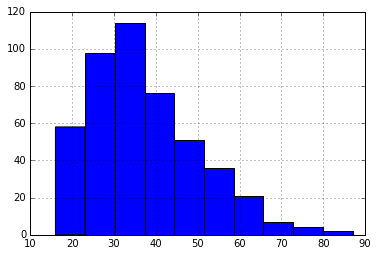

In [66]:
# 10. Display a histogram of ages of all killings
killings['age'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ccd4710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11debec50>]], dtype=object)

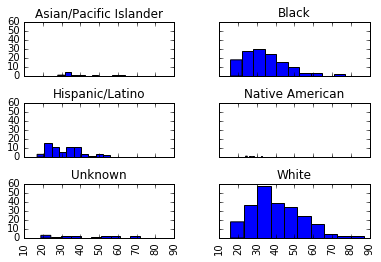

In [69]:
# 11. Show 6 histograms of ages by race
killings['age'].hist(by=killings['race'],sharex=True,sharey=True)

In [79]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

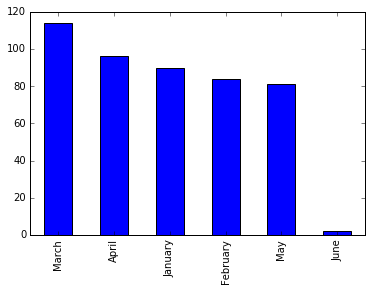

In [95]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [4]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [5]:
majors.describe()

,Unnamed: 0,Major_code,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
count,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,86.000000,3879.815029,2.302566e+05,1.661620e+05,1.263078e+05,9725.034682,0.057355,56816.184971,38697.109827,82506.358382
std,50.084928,1687.753140,4.220685e+05,3.073244e+05,2.424254e+05,18022.040192,0.019177,14706.226865,9414.524761,20805.330126
min,0.000000,1100.000000,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35000.000000,24900.000000,45800.000000
25%,43.000000,2403.000000,2.428000e+04,1.728100e+04,1.272200e+04,1101.000000,0.046261,46000.000000,32000.000000,70000.000000
50%,86.000000,3608.000000,7.579100e+04,5.656400e+04,3.961300e+04,3619.000000,0.054719,53000.000000,36000.000000,80000.000000
75%,129.000000,5503.000000,2.057630e+05,1.428790e+05,1.110250e+05,8862.000000,0.069043,65000.000000,42000.000000,95000.000000
max,172.000000,6403.000000,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.156147,125000.000000,78000.000000,210000.000000


In [6]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop('Employed_full_time_year_round',axis=1,inplace=True)
majors.drop('Major_code',axis=1,inplace=True)
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [7]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [8]:
# 3. What are the top 10 highest paying majors?
majors.sort_index(by='Median').tail(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
51,51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,0,0.000000,85000,55000,125000.0
45,45,CHEMICAL ENGINEERING,Engineering,188046,131697,6388,0.046261,86000,60000,120000.0
48,48,ELECTRICAL ENGINEERING,Engineering,671647,489965,26064,0.050509,88000,60000,116000.0
97,97,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,150,0.024900,92000,53000,136000.0
56,56,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,366,0.047032,92000,52000,124000.0
58,58,NUCLEAR ENGINEERING,Engineering,9826,7320,527,0.067159,95000,65000,128000.0
55,55,METALLURGICAL ENGINEERING,Engineering,12818,6939,326,0.044873,96000,65000,123000.0
57,57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,449,0.040309,97000,60000,125000.0
154,154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,4414,0.034358,106000,78000,125000.0
59,59,PETROLEUM ENGINEERING,Engineering,19631,14002,617,0.042205,125000,75000,210000.0


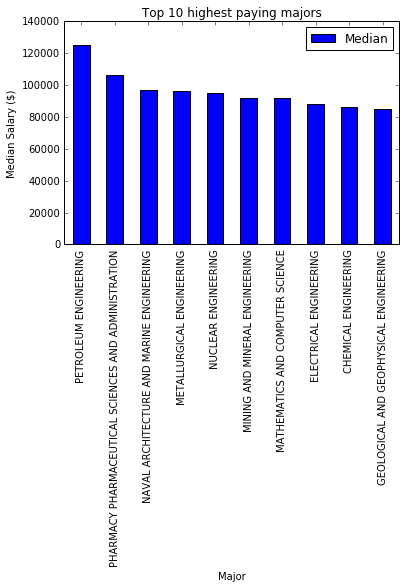

In [11]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
top10 = majors[['Major','Median']].sort_values(by='Median',ascending=False).head(10) #sort_index(by='Median').tail(10)
top10.plot(kind='bar',x='Major',title='Top 10 highest paying majors')
plt.xlabel('Major')
plt.ylabel('Median Salary ($)')

In [152]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [154]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().order().tail(5)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Major_category
Health                     56458.333333
Business                   60615.384615
Physical Sciences          62400.000000
Computers & Mathematics    66272.727273
Engineering                77758.620690
Name: Median, dtype: float64

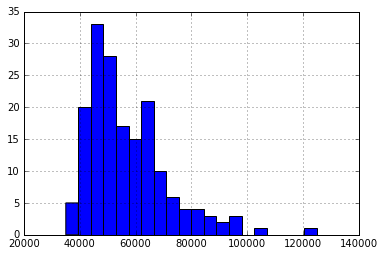

In [156]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122338e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12531b750>]], dtype=object)

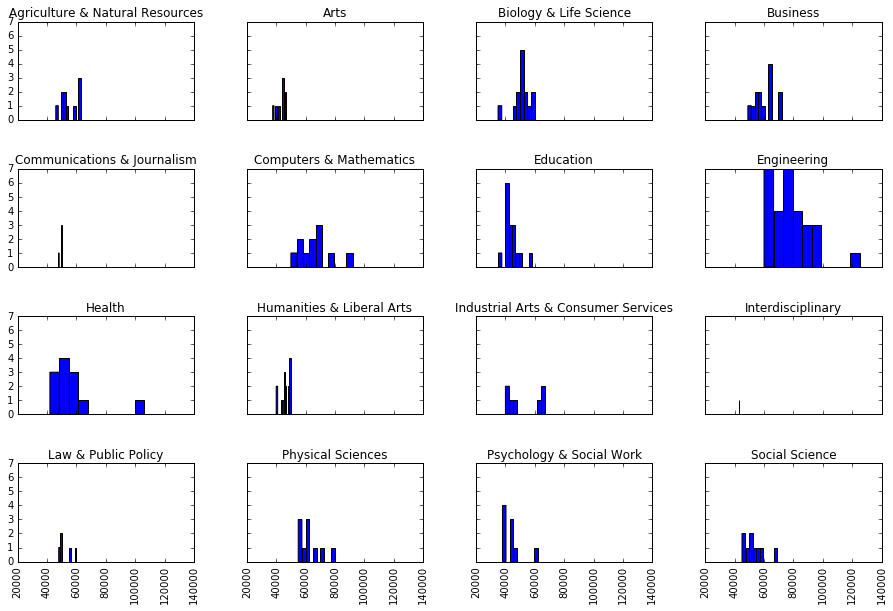

In [159]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.Median.hist(by=majors.Major_category,sharex=True,sharey=True, figsize=(15,10))

In [164]:
# 9. What are the top 10 most UNemployed majors?
majors[['Major','Unemployment_rate']].sort_index(by='Unemployment_rate').tail(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major,Unemployment_rate
11,ARCHITECTURE,0.085991
104,ASTRONOMY AND ASTROPHYSICS,0.086022
119,SOCIAL PSYCHOLOGY,0.087336
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
141,VISUAL AND PERFORMING ARTS,0.094658
77,LIBRARY SCIENCE,0.094843
27,SCHOOL STUDENT COUNSELING,0.101746
93,MILITARY TECHNOLOGIES,0.101796
116,CLINICAL PSYCHOLOGY,0.102712
146,MISCELLANEOUS FINE ARTS,0.156147


In [165]:
# What are the unemployment rates?
majors[['Major','Unemployment_rate']].sort_index(by='Unemployment_rate').Unemployment_rate.tail(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


11     0.085991
104    0.086022
119    0.087336
19     0.090264
141    0.094658
77     0.094843
27     0.101746
93     0.101796
116    0.102712
146    0.156147
Name: Unemployment_rate, dtype: float64

In [169]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category').Unemployment_rate.mean().order().tail(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


Major_category
Physical Sciences                      0.054541
Industrial Arts & Consumer Services    0.058546
Computers & Mathematics                0.059437
Social Science                         0.065686
Law & Public Policy                    0.067854
Communications & Journalism            0.069125
Humanities & Liberal Arts              0.069429
Interdisciplinary                      0.077269
Psychology & Social Work               0.077867
Arts                                   0.087601
Name: Unemployment_rate, dtype: float64

In [173]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors['Employed'] / majors['Total']
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [174]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = 1 - majors['sample_employment_rate']

In [ ]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [76]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
businesses.drop(['phone_number','TaxCode',
                 'business_certificate','application_date',
                'owner_name','owner_address','owner_city','owner_state'],axis=1,inplace=True)
businesses.head()

,business_id,name,address,city,postal_code,latitude,longitude,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,94114


In [77]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=['date'])
inspections.head()

,business_id,Score,date,type
0,10,NaN,2014-08-07,Reinspection/Followup
1,10,94.0,2014-07-29,Routine - Unscheduled
2,10,NaN,2014-01-24,Reinspection/Followup
3,10,92.0,2014-01-14,Routine - Unscheduled
4,19,94.0,2014-11-10,Routine - Unscheduled


In [78]:
violations = pd.read_csv('./data/violations_plus.csv' ,parse_dates=['date'])
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [79]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
# pd.concat([businesses.head(2),inspections.head(2),violations.head(2)])
inspection_violations = pd.merge(inspections,violations,how='left',on=['business_id','date'])
restaurant_scores = pd.merge(inspection_violations,businesses,how='left',on=['business_id'])
restaurant_scores.head()

,business_id,Score,date,type,ViolationTypeID,risk_category,description,name,address,city,postal_code,latitude,longitude,owner_zip
0,10,NaN,2014-08-07,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
1,10,94.0,2014-07-29,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
2,10,94.0,2014-07-29,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
3,10,NaN,2014-01-24,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
4,10,92.0,2014-01-14,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104


In [80]:
# 2 Which ten business have had the most inspections?
restaurant_scores.isnull().sum()

business_id            0
Score              15599
date                   0
type                   0
ViolationTypeID    13486
risk_category      13498
description        13498
name                 215
address              215
city                9282
postal_code         1563
latitude           16016
longitude          16016
owner_zip            598
dtype: int64

In [81]:
# 3 Group and count the inspections by type
restaurant_scores.groupby('type').count()

,business_id,Score,date,ViolationTypeID,risk_category,description,name,address,city,postal_code,latitude,longitude,owner_zip
type,,,,,,,,,,,,,
Administrative or Document Review,4,0,4,0,0,0,4,4,3,4,3,3,4
Complaint,3155,0,3155,2006,2005,2005,3150,3150,2760,3116,2501,2501,3143
Complaint Reinspection/Followup,168,0,168,12,12,12,168,168,153,167,137,137,164
Foodborne Illness Investigation,246,0,246,188,188,188,246,246,212,244,199,199,246
Multi-agency Investigation,2,0,2,0,0,0,2,2,2,2,2,2,2
New Construction,1643,0,1643,45,45,45,1635,1635,915,1542,326,326,1624
New Ownership,2665,0,2665,1120,1120,1120,2660,2660,1281,2612,81,81,2632
Non-inspection site visit,1008,0,1008,208,208,208,1003,1003,838,978,706,706,998
Reinspection/Followup,6043,3,6043,1178,1175,1175,6020,6020,5342,5944,4685,4685,5990


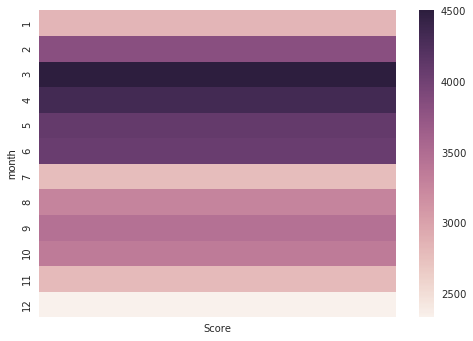

In [82]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
import seaborn as sns
import numpy as np
restaurant_scores['month'] = restaurant_scores['date'].dt.month
data = restaurant_scores.groupby('month').count()
data['month2'] = data.index
ax = sns.heatmap(data[['Score']])

In [85]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores.owner_zip.value_counts().head(1)

94110    4390
Name: owner_zip, dtype: int64

In [87]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
restaurant_scores[restaurant_scores.type == 'New Ownership'].risk_category.value_counts()

Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

In [91]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3751
Name: description, dtype: int64

In [132]:
# 8 What street has the best (safest) restaurants to dine out at?
import re
restaurant_scores['street'] = restaurant_scores['address'].str.strip().str.lower()


def clean_street(street):
    if type(street) == str:
        reggie = re.search("(\d*)\s([a-zA-z0-9 ]*(street|st|avenue|ave|road|rd|highway|hwy| \
                          square|sq|trail|trl|drive|dr|court|ct|parkway|pkwy|circle|cir|boulevard| \
                          blvd|Street|St|Ave|Avenue|Pl|Place))",street,re.IGNORECASE)
        if reggie and len(reggie.group()) > 1:
            return reggie.group(2)
        return None
    
restaurant_scores['street_only'] = restaurant_scores['street'].apply(clean_street)
restaurant_scores.groupby('street_only').ViolationTypeID.count().order().tail(1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: order is deprecated, use sort_values(...)


street_only
mission st    2276
Name: ViolationTypeID, dtype: int64

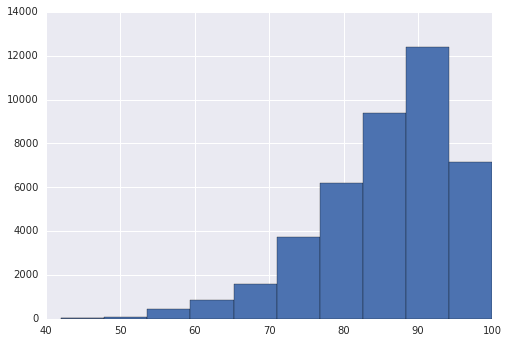

In [133]:
# 9 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins=10)

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/
